In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
from keras import backend as K
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
#training data from https://github.com/IdleHandsProject/makennbot
#    B    BL    L   FL   F    FR    R    BR   X    Y    R
x_train = [
  [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.5],
  [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.5],
  [ 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.5, 1.0, 0.5],
  [ 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.5, 1.0, 0.5],
  [ 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.5, 1.0, 0.5],
  [ 0.0, 0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.5, 0.8, 0.5],
  [ 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.8, 0.5],
]
y_train = [
  [ 0.5, 1.0, 0.5],
  [ 0.5, 1.0, 0.5],
  [ 0.5, 0.0, 0.5],
  [ 0.5, 0.7, 0.6],
  [ 0.5, 0.6, 0.7],
  [ 0.5, 0.4, 0.5],
  [ 0.5, 0.6, 0.7],
]

x_train = np.array(x_train)
y_train = np.array(y_train)

In [3]:
model = Sequential()

IN = x_train.shape[1]
HIDDEN = IN + 1
OUT = y_train.shape[1]

model.add(Dense(units=HIDDEN, activation='sigmoid', input_dim=IN, dtype='float16'))
model.add(Dense(units=OUT, activation='sigmoid', dtype='float16'))

model.compile(loss='mean_squared_error',
              optimizer=optimizers.SGD(learning_rate=0.5, momentum=0.9))


In [4]:
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        #self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        
        plt.grid(True)
        plt.plot(self.x, self.losses, label="loss")
        #plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

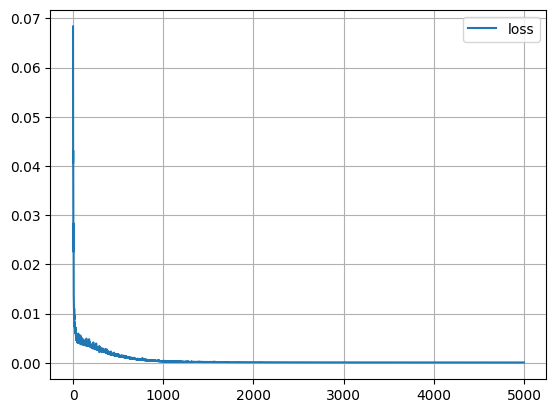

In [5]:
#callback = keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001)
history = model.fit(x_train, y_train, epochs=5000, batch_size=1, verbose=False, callbacks=[plot_losses])

In [6]:
print('loss:\t', history.history['loss'][-1])
preds = model.predict(x_train).tolist()
for i, pred in enumerate(preds):
    print('model:\t', np.round(pred,2))
    print('label:\t', y_train[i])
    print(' ')

loss:	 6.54969917377457e-05
1/1 [==============================] - 0s 184ms/step
model:	 [0.5  0.98 0.5 ]
label:	 [0.5 1.  0.5]
 
model:	 [0.5  0.98 0.5 ]
label:	 [0.5 1.  0.5]
 
model:	 [0.5  0.01 0.5 ]
label:	 [0.5 0.  0.5]
 
model:	 [0.5 0.7 0.6]
label:	 [0.5 0.7 0.6]
 
model:	 [0.5 0.6 0.7]
label:	 [0.5 0.6 0.7]
 
model:	 [0.5 0.4 0.5]
label:	 [0.5 0.4 0.5]
 
model:	 [0.5  0.61 0.7 ]
label:	 [0.5 0.6 0.7]
 


In [7]:
def to_str(name, W):
    s = str(W.tolist()).replace('[', '').replace(']', '\n').replace(',', '\nlong ')
    return 'f'+name+'\nlong ' + s + 'fEnd'+name

In [8]:
# output weights as strings you can copy into arduino sketch
W1 = np.vstack((K.eval(model.weights[0]), K.eval(model.weights[1])))
W2 = np.vstack((K.eval(model.weights[2]), K.eval(model.weights[3])))

print('// replace these two lines in spin2 code:')
print('// float HiddenWeights[InputNodes+1][HiddenNodes]')
print('// float OutputWeights[HiddenNodes+1][OutputNodes]')
print('// With trained weights below.')
print('\n')
print(to_str('HiddenWeights', W1))
print(to_str('OutputWeights', W2))

// replace these two lines in spin2 code:
// float HiddenWeights[InputNodes+1][HiddenNodes]
// float OutputWeights[HiddenNodes+1][OutputNodes]
// With trained weights below.


fHiddenWeights
long -0.176513671875
long  -0.153564453125
long  0.423828125
long  -0.4658203125
long  0.091796875
long  -0.02783203125
long  -0.15869140625
long  -0.3173828125
long  -0.215576171875
long  0.1865234375
long  0.3603515625
long  0.3623046875

long  -0.30419921875
long  -0.44580078125
long  0.41015625
long  0.177734375
long  0.4716796875
long  0.4541015625
long  -0.100830078125
long  -0.25927734375
long  0.48291015625
long  0.5
long  0.25830078125
long  -0.3740234375

long  0.55712890625
long  -0.455322265625
long  0.1304931640625
long  0.332275390625
long  1.568359375
long  0.72314453125
long  0.160400390625
long  -0.51416015625
long  -1.1005859375
long  -0.2484130859375
long  0.74853515625
long  0.50390625

long  0.228515625
long  -0.1846923828125
long  0.38427734375
long  0.169189453125
long  0.392